<a href="https://colab.research.google.com/github/JoseAguirre-10/Tarea-1-Optimizaci-n-Matem-tica/blob/main/AmongosTarea1_NOMBRE_APELLIDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install gurobipy

In [13]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB
from gurobipy import Model
from gurobipy import quicksum
from gurobipy import *

#P1


In [ ]:
#hola como estan este es una prueba de guardado en github

#P2


In [29]:
#@title Funciones útiles (no editar)
import numpy as np
import matplotlib.pyplot as plt

def generador_puntos_separados(n,seed=42):

  np.random.seed(seed)
  group1 = np.random.randn(n, 2)
  group2 = np.random.randn(n, 2) + [4, 4]
  X = np.vstack([group1, group2])
  y = np.hstack([np.zeros(n)-1, np.ones(n)])
  return X,y

def generador_puntos_mezclados(n,seed=42):
  np.random.seed(seed)
  group1 = np.random.randn(n, 2)
  group2 = np.random.randn(n, 2) + [1,2]
  X = np.vstack([group1, group2])
  y = np.hstack([np.zeros(n)-1, np.ones(n)])
  return X,y

def graficar(X,y,w=None,b=None):
  plt.figure(figsize=(8, 6))
  if w is not None and b is not None:
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]),100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k-', label='Hiperplano separante')

  group1 = X[y == -1]
  group2 = X[y == 1]
  plt.scatter(group1[:, 0], group1[:, 1], color='blue', label='Group 1')
  plt.scatter(group2[:, 0], group2[:, 1], color='red', label='Group 2')


  # Add titles and labels
  plt.title('Separación de dos grupos')
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.legend()
  plt.show()

  Amongus = generador_puntos_mezclados(23)


Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 100 rows, 3 columns and 300 nonzeros
Model fingerprint: 0xfb64b2f8
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-03, 7e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 100 rows, 3 columns, 300 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 3
 AA' NZ     : 4.950e+03
 Factor NZ  : 5.050e+03
 Factor Ops : 3.384e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.06878010e-11 

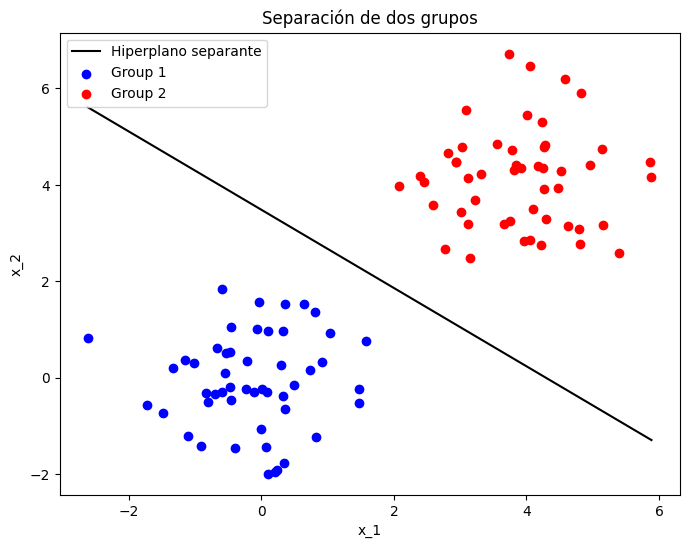

In [38]:
from gurobipy import Model, GRB, QuadExpr
import numpy as np

# 1. Generar puntos con tu función
X, y = generador_puntos_separados(50)  # 50 puntos por clase

# 2. Crear modelo en Gurobi
modelo = Model("SVM_margen_duro")

# 3. Variables: w = [w1, w2], b
w = modelo.addVars(2, lb=-GRB.INFINITY, name="w")  # w[0] y w[1]
b = modelo.addVar(lb=-GRB.INFINITY, name="b")

# 4. Restricciones: y_i * (w^T x_i + b) >= 1
for i in range(len(X)):
    x_i = X[i]
    y_i = y[i]
    expr = y_i * (w[0]*x_i[0] + w[1]*x_i[1] + b)
    modelo.addConstr(expr >= 1, name=f"restriccion_{i}")

# 5. Función objetivo: minimizar (1/2) * ||w||^2 = (1/2)(w1² + w2²)
objetivo = QuadExpr()
objetivo += w[0]*w[0] + w[1]*w[1]
modelo.setObjective(0.5 * objetivo, GRB.MINIMIZE)

# 6. Ejecutar optimización
modelo.optimize()

# 7. Extraer solución óptima
w_opt = np.array([w[0].X, w[1].X])
b_opt = b.X

#print("w =", w_opt)
#print("b =", b_opt)

# 8. Graficar con tu función
graficar(X, y, w=w_opt, b=b_opt)


In [15]:
#m = Model("modelo1")

Restricted license - for non-production use only - expires 2026-11-23


In [19]:
#Amongus = generador_puntos_mezclados(23)
#x = m.addVars(Amongus, vtype=GRB.CONTINUOUS, name="x")
#y = m.addVars(Amongus, vtype=GRB.CONTINUOUS, name="Y")

#m.update()


GurobiError: Name too long (maximum name length is 255 characters)

In [ ]:
#m.setObjetctive(2/np.linalg.norm(w), GRB.MAXIMIZE)

In [9]:
#def y(a):
#  if w.reshape(-1, 1)*a + b >= 1
#    return 1
#  else:
#    return -1
#for x in A:

#  m.addConstr(y(x)*(w.reshape(-1, 1)*x + b) >= 1, "r0")


SyntaxError: unmatched ')' (<ipython-input-9-d696e9c7fd92>, line 2)

In [ ]:
#m.optimize()

In [8]:
#print(generador_puntos_mezclados(23))

(array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753],
       [-1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ],
       [ 0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259],
       [-1.15099358,  0.37569802],
       [-0.60063869, -0.29169375],
       [-0.60170661,  1.85227818],
       [-0.01349722, -1.05771093],
       [ 0.82254491, -1.22084365],
       [ 0.2088636 , -1.95967012],
       [-1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828],
       [-0.11564828, -0.3011037 ],
       [-1.47852199, -0.71984421],
       [ 0.53936123,  3.05712223],
       [ 1.34361829,  0.23695984],
       [ 1.32408397,  1.61491772],
       [ 0.323078  ,  2.61167629],
       [ 2.03099952,  2.93128012],
       [ 0.16078248

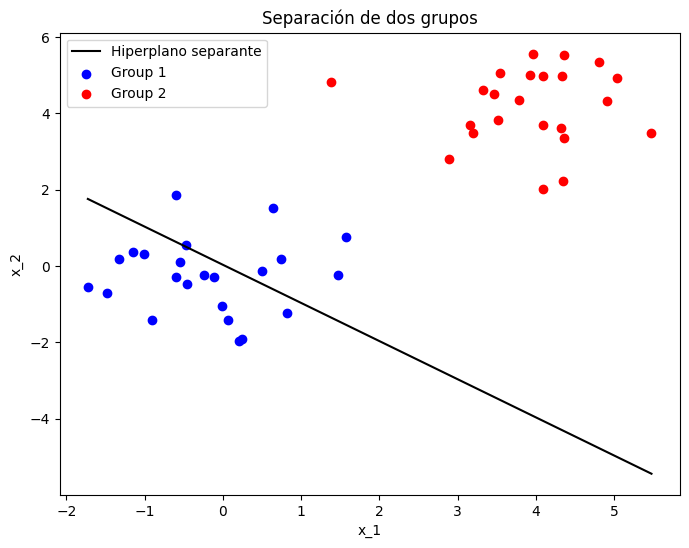

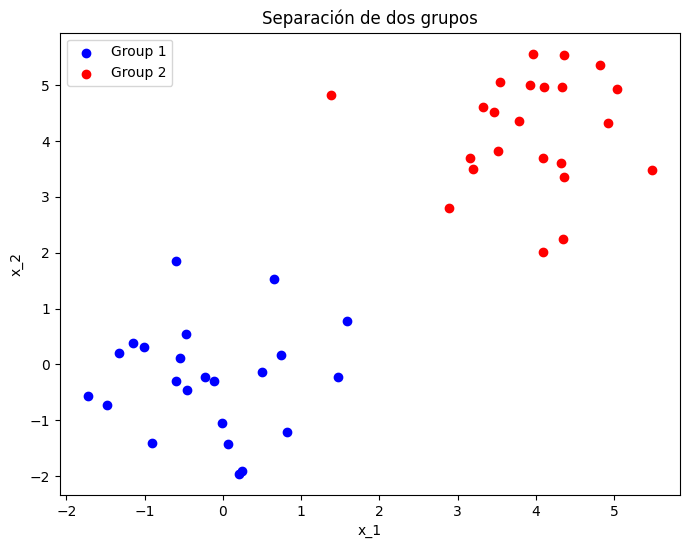

In [ ]:
#Ejemplo:
X,y=generador_puntos_separados(23)
graficar(X,y,(3,3),-0.1) # Con hiperplano
graficar(X,y) # Sin hiperplano

## b)


##d)